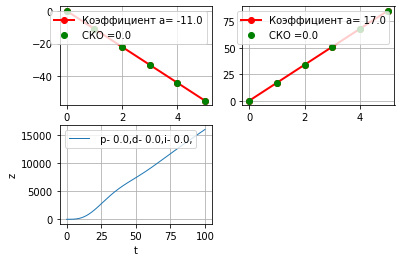

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def mnkLIN(x,y,q): # аппроксимация характеристик статических объектов МНК                            
    a=round((len(x)*sum([x[i]*y[i] for i in range(0,len(x))])-sum(x)*sum(y))/(len(x)*sum([x[i]**2 for i in range(0,len(x))])-sum(x)**2),3)
    b=round((sum(y)-a*sum(x))/len(x) ,3)
    y1=[round(a*w+b ,3) for w in x]         
    s=[round((y1[i]-y[i])**2,3) for i in range(0,len(x))]                          
    sko=round((sum(s)/(len(x)-1))**0.5,3)
    if q==1:
        plt.subplot(221)
        plt.plot(x, y, color='r', linewidth=2, marker='o', label='Коэффициент a= %s'%str(a))
        plt.plot(x, y1, color='g', linestyle=' ', marker='o', label='СКО =%s'%str(sko))
        plt.legend(loc='best')
        plt.grid(True)
    else:
        plt.subplot(222)
        plt.plot(x, y, color='r', linewidth=2, marker='o', label='Коэффициент a= %s'%str(a))
        plt.plot(x, y1, color='g', linestyle=' ', marker='o', label='СКО =%s'%str(sko))
        plt.legend(loc='best')
        plt.grid(True)                      
    return a             
T1=7.0;T2=5.0;s=0.4;k1=5.5;k2=5.5# параметры  объекта регулирования.
x=[0,1,2,3,4,5]
y=[0,-11,-22,-33,-44,-55]
a2=mnkLIN(x,y,1)
x=[0,1,2,3,4,5]
y=[0,17,34,51,68,85]
a3=mnkLIN(x,y,2)
#m1=0.5;m2=2.0;m3=0.3# параметры  ПИД регулятора.
m1=0.0;m2=0.0;m3=0.0
a=a2+a3
A=round((s*T1*T2+T1**2)/(T1*T2**2),3)
B=round((T2+s*T1+k1*k2*m2*a)/(T1*T2**2),3)
C=round((1+k1*k2*m1*a)/(T1*T2**2),3)
D=round(k1*k2*m3*a/(T1*T2**2),3)
E=round(k1*k2*a/(T1*T2**2),3)
def f(y, t):#  решение дифференциального уравнения системы регулирования.
                y1,y2,y3,y4 = y 
                return [y2,y3,y4,-A*y4-B*y3-C*y2-D*y1+E]
t = np.linspace(0,100,10000)
y0 = [0,1,0,0]#начальные условия
w = odeint(f, y0, t)
y1=w[:,0] # вектор значений решения
y2=w[:,1] # вектор значений производной
plt.subplot(223)
plt.plot(t,y1,linewidth=1, label=' p- %s,d- %s,i- %s,'%(str(m1),str(m2),str(m3)))
plt.ylabel("z")
plt.xlabel("t")
plt.legend(loc='best')
plt.grid(True)
plt.show()
